# This notebook corresponds to the VAIL Day 19 Activity


* Autoencoding sees the use of Nueral Networks to both compress and decompress data
* The actual algorithmic process by which NNs perform the data compression/decompression is learned via optimization as opposed to provided by the programmer 
* Autoencoders are data specific as the NN can only perform well on data similar to the training data it was fit to
* Autoencoders are lossy (they do not perserve all input data information)
* Since Autoencoders learn from passed training data, the overall compression/decompression algorithm never has to be explicitly tweaked for new datasets (all we have to do is just provide new data to out NN)
* 3 things needed for an autoencoder:
    * encoding mechanism (compression)
    * de-encoding mechanism (decompression)
    * loss function that tells out model how poorly its data reconstruction is when compared to the passed input data

* Autoencoders are applicable in reducing the dimensonality of a dataset (parsing out the noise from the data)

In [ ]:
#simple autoencoder
"""
Recall:
The purpose of autoencoders is to yield outputs which are as close as possible to the input data
Autoencoders can be broken down into 2 main functions
1) Encoder which recieves input data and compresses it to its most relevant features
2) Decoder which processes the encoder-compressed data and attempts to rebuild
    the passed input data (ex: rebuild a passed input image)
We use a loss function to tell our overall model how "bad" its data outuputs are.
Stochastic Gradient Descent allows us to optimize our model's weights
"""  
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#imprting MNIST Dataset to test our autoencoder on
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#changing encoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 3s 5ms/step - loss: 0.3846 - val_loss: 0.1898
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1801 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1494 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1320 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1205 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1132 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1079 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1039 - val_loss: 0.1002
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1008 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0986 - val_loss: 0.0960

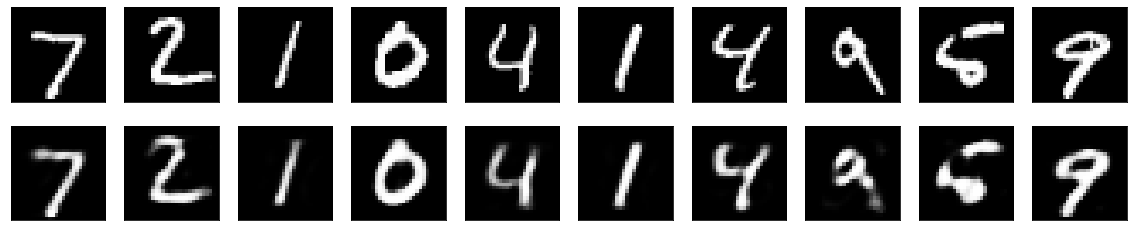

In [ ]:
#testing the overall accuracy of our encoder by visualizing some images

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#applying regularization to our model so it will not overfit + perform better on unseen data
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
#creating a deep autoendoer by stacking encoding/decoding layers:

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3448 - val_loss: 0.1687
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1597 - val_loss: 0.1399
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1373 - val_loss: 0.1276
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1272 - val_loss: 0.1212
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1214 - val_loss: 0.1170
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1172 - val_loss: 0.1132
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1142 - val_loss: 0.1102
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1107 - val_loss: 0.1072
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1079 - val_loss: 0.1053
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1055 - val_lo

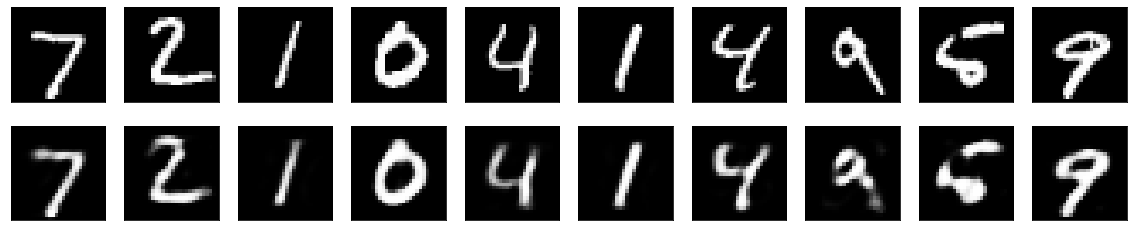

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
"""
Since we are working with image data, we should explore 
with using a CNN as the encoder/decoder in our overall autoencoder
Note the use of convo2d layers + upsampling layers in the decoder 
"""
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
!tensorboard --logdir=/tmp/autoencoder

2021-02-27 03:49:40.985120: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 8s 6ms/step - loss: 0.3100 - val_loss: 0.1461
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1418 - val_loss: 0.1292
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1276 - val_loss: 0.1196
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1191 - val_loss: 0.1144
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1144 - val_loss: 0.1109
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1112 - val_loss: 0.1082
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1088 - val_loss: 0.1063
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1069 - val_loss: 0.1048
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1057 - val_loss: 0.1039
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1044 - val_loss: 0.1026

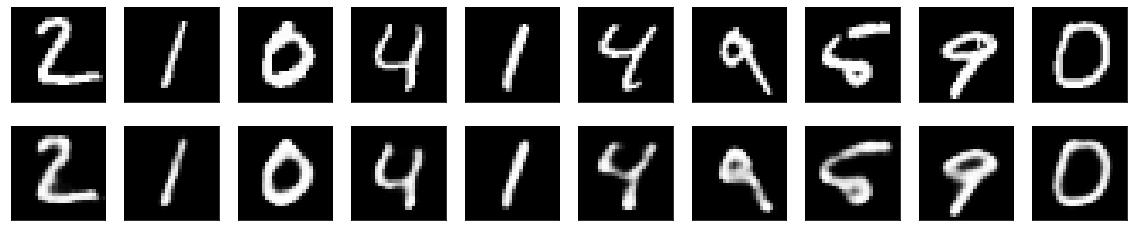

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
#pltto
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

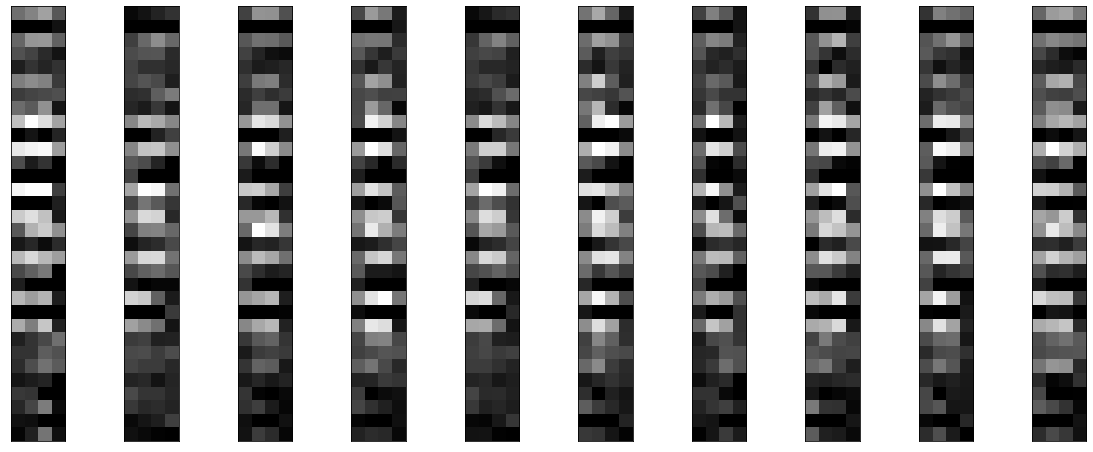

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

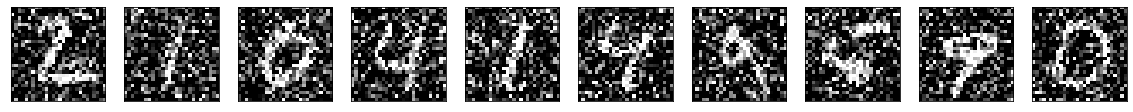

In [ ]:
#experimenting with addding noise to our dataset to make model
#more robust
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#increasing model complexity + training on noisy data:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 7ms/step - loss: 0.2533 - val_loss: 0.1167
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1155 - val_loss: 0.1088
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1094 - val_loss: 0.1051
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1058 - val_loss: 0.1028
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1035 - val_loss: 0.1014
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1023 - val_loss: 0.1002
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - val_loss: 0.0999
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0999 - val_loss: 0.0987
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0985
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0989 - val_lo

In [ ]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
#Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

10000
10000


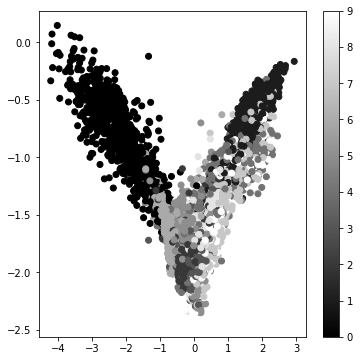

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))

plt.scatter([a for a,b in x_test_encoded[0]],[a for a,b in x_test_encoded[1]],c=y_test)
plt.colorbar()
plt.show()


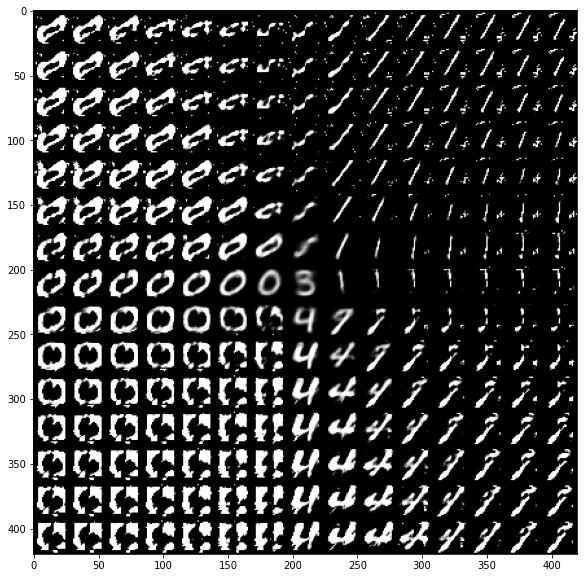

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()